
Python Project by Shiva Azizzadeh -Group 3


Data : 2024-02-06

classification Method(Logistic Regresiion)

# Healthcare -Diabetes

Description

NIDDK (National Institute of Diabetes and Digestive and Kidney Diseases) research creates knowledge about and treatments for the most chronic, costly, and consequential diseases.

The dataset used in this project is originally from NIDDK. 


The objective is to predict whether or not a patient has diabetes, based on certain diagnostic measurements in the dataset.
Build a model to accurately predict whether the patients in the dataset have diabetes or not.

### Step 1: Importing Necessary Libraries

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

### Step 2: Loading the Dataset

In [5]:
# url=https://www.kaggle.com/datasets/gyanashish/healthcare-diabetes/data
df=pd.read_csv('health care diabetes.csv')
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [48]:
df.rename(columns={'DiabetesPedigreeFunction': 'DPF'}, inplace=True)

 Dataset Description


The dataset consists of several medical predictor variables and one target variable (Outcome). Predictor variables include the number of pregnancies the patient has had, their BMI, insulin level, age, and more.

Variables Description
• Pregnancies Number of times pregnant
• Glucose Plasma glucose concentration in an oral glucose tolerance test
• BloodPressure Diastolic blood pressure (mm Hg)
• SkinThickness Triceps skinfold thickness (mm)
• Insulin Two-hour serum insulin
• BMI Body Mass Index
• DiabetesPedigreeFunction Diabetes pedigree function
• Age Age in years
• Outcome Class variable (either 0 or 1). 268 of 768 values are 1, and the others are 0


In [49]:
df.shape

(768, 9)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    float64
 3   SkinThickness  768 non-null    float64
 4   Insulin        768 non-null    float64
 5   BMI            768 non-null    float64
 6   DPF            768 non-null    float64
 7   Age            768 non-null    int64  
 8   Outcome        768 non-null    int64  
dtypes: float64(5), int64(4)
memory usage: 54.1 KB


As you can see, we have over 768 rows, each with 8 feature columns and 1 target column

In [51]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

<Axes: ylabel='Outcome'>

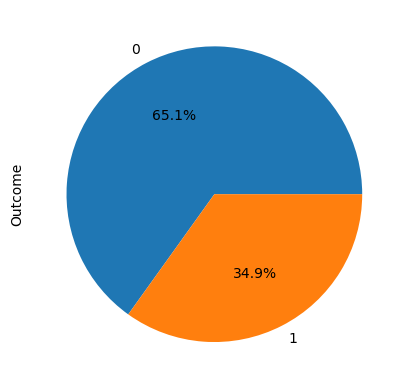

In [52]:
df['Outcome'].value_counts().sort_index().plot(kind='pie', autopct='%1.1f%%')


From 768 enteries 500 (65%) of observations do not have Diabetes and 35% are positive Dibetes

In [53]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,31.972618,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,0.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
The output of df.describe() provides descriptive statistics for each numerical column in the DataFrame. Here's how to interpret the results:

count: This represents the number of non-null values in each column.
mean: This is the average value of each column.
std: This is the standard deviation, which measures the amount of variation or dispersion from the mean.
min: This is the minimum value observed in each column.
25%: This represents the first quartile (Q1), or the value below which 25% of the data falls.
50%: This represents the median, or the value below which 50% of the data falls. This is also known as the second quartile (Q2) or the median.
75%: This represents the third quartile (Q3), or the value below which 75% of the data falls.
max: This is the maximum value observed in each column.
WE can see that in some columns like insulin difference between 75% quantile and Maximum is about 3* of IQR. So we comclude that
we have outliers.
Also we have to Scale means to standardizing numerical features in a dataset to a similar scale.

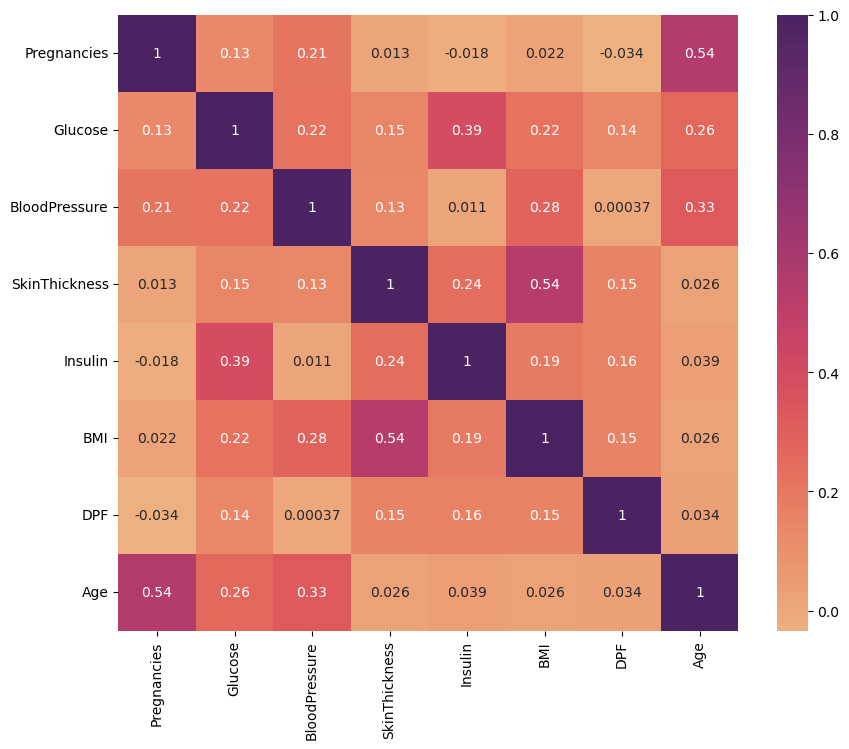

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
df1=df.drop("Outcome",axis=1)
Corr_Matrix =df1.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(Corr_Matrix ,annot=True ,cmap='flare')
plt.show()

Each cell in the heatmap represents the correlation coefficient between two features, with higher values indicating stronger 
correlations.
If the correlation coefficient is close to +1 or -1, it suggests a strong linear relationship between the variables.
If the correlation coefficient is close to 0, it suggests weak or no linear relationship between the variables.
A positive correlation ( r>0r>0 ) indicates that as one variable increases, the other variable also tends to increase.
A negative correlation ( r<0r<0 ) indicates that as one variable increases, the other variable tends to decrease.
    
    

### Step 3: Data Pre-processing

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    float64
 3   SkinThickness  768 non-null    float64
 4   Insulin        768 non-null    float64
 5   BMI            768 non-null    float64
 6   DPF            768 non-null    float64
 7   Age            768 non-null    int64  
 8   Outcome        768 non-null    int64  
dtypes: float64(5), int64(4)
memory usage: 54.1 KB


Here's what each part of the output represents:

    Index: 768 enteries in availabe in data set from index 0 to index 767
    Columns: The names of the columns( variables)in the DataFrame is 9 which 1 is dependent variable and 8 are independent variable.
    Non-Null Count: The number of non-null values in each column.
    Data Type: The data type of each column.
    Memory Usage: The amount of memory used by the DataFrame.

In [57]:
df.isna().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
DPF              0
Age              0
Outcome          0
dtype: int64

In [58]:
#Dealing with missing values
#zero value in Glucose,BloodPressure,SkinThickness,Insulin ,BMI does not mean SO:
# we fill  zero values for Glucose,BloodPressure,SkinThickness,Insulin ,BMI by mean of the variable
df[df['Glucose']==0]
df[df['BloodPressure']==0].head()
df[df['SkinThickness']==0].head()
df[df['Insulin']==0].head()
df[df['BMI']==0]


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome


In [59]:
variables=['BloodPressure', 'SkinThickness', 'Insulin','BMI']
for i in variables:
    df[i].replace(0,df[i].mean(),inplace=True)

In [60]:
df[df['Glucose']==0]
df[df['BloodPressure']==0].head()
df[df['SkinThickness']==0].head()
df[df['Insulin']==0].head()
df[df['BMI']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome


The df.isna().sum() method is used to count the number of missing values (NaN or None) in each column of a DataFrame (df). 
It returns a Series containing the count of missing values for each column.Here we have 0 missing values in our Data Frmae.
But On the columns below, a value of zero does not make sense and thus indicates missing value:

• Glucose

• BloodPressure

• SkinThickness

• Insulin

• BMI

So we used mean and replaced all the enteries in mentioned variables with mean of the variable.

In [61]:
df.duplicated().sum()

0

The code df.duplicated().sum() calculates the total number of duplicated rows in the DataFrame df. If the result is greater than
0, it means there are duplicate rows in the DataFrame.Here we have no Duplicated row and all are unique.

In [62]:
#checking Normality
from sklearn.preprocessing import StandardScaler

X = df.drop('Outcome', axis=1)

sc = StandardScaler()

X_scaled = sc.fit_transform(X)
X_scaled[:5]




array([[ 0.63994726,  0.84832379, -0.0210444 ,  0.87205698, -0.41776815,
         0.16725546,  0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.51658286,  0.2486783 , -0.41776815,
        -0.85153454, -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.68176235, -0.6306536 , -0.41776815,
        -1.33182125,  0.60439732, -0.10558415],
       [-0.84488505, -0.99820778, -0.51658286, -0.37470037, -0.26510678,
        -0.6332224 , -0.92076261, -1.04154944],
       [-1.14185152,  0.5040552 , -2.66391618,  0.87205698,  0.5304233 ,
         1.54989902,  5.4849091 , -0.0204964 ]])

Feature scaling is a preprocessing step that standardizes the range of independent variables, making them comparable and ensuring 
that they contribute equally to the analysis.

In [63]:
import scipy.stats as stats

X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)
X_scaled_df.head()
for col in X_scaled_df.columns:
    print(f"Normality test results for col: {col}", stats.normaltest(X_scaled_df[col]))

Normality test results for col: Pregnancies NormaltestResult(statistic=80.16379459199474, pvalue=3.914291638783729e-18)
Normality test results for col: Glucose NormaltestResult(statistic=12.385056622689767, pvalue=0.0020446506991363502)
Normality test results for col: BloodPressure NormaltestResult(statistic=21.83202230520344, pvalue=1.816504976652589e-05)
Normality test results for col: SkinThickness NormaltestResult(statistic=199.87049159193003, pvalue=3.968936980607427e-44)
Normality test results for col: Insulin NormaltestResult(statistic=564.2668702076353, pvalue=2.9580531562149313e-123)
Normality test results for col: BMI NormaltestResult(statistic=54.948025941114054, pvalue=1.1700051439886818e-12)
Normality test results for col: DPF NormaltestResult(statistic=321.8390780805831, pvalue=1.2987697487612698e-70)
Normality test results for col: Age NormaltestResult(statistic=119.87763596211627, pvalue=9.308980038236983e-27)


We have performed normality test and we can see that all pvalues are less than 5% . So we reject the null hypothesis and 
conclude that the observed data is unlikely to have come from a normal distribution. 
Therefore, we may conclude that the data does not follow a normal distribution.

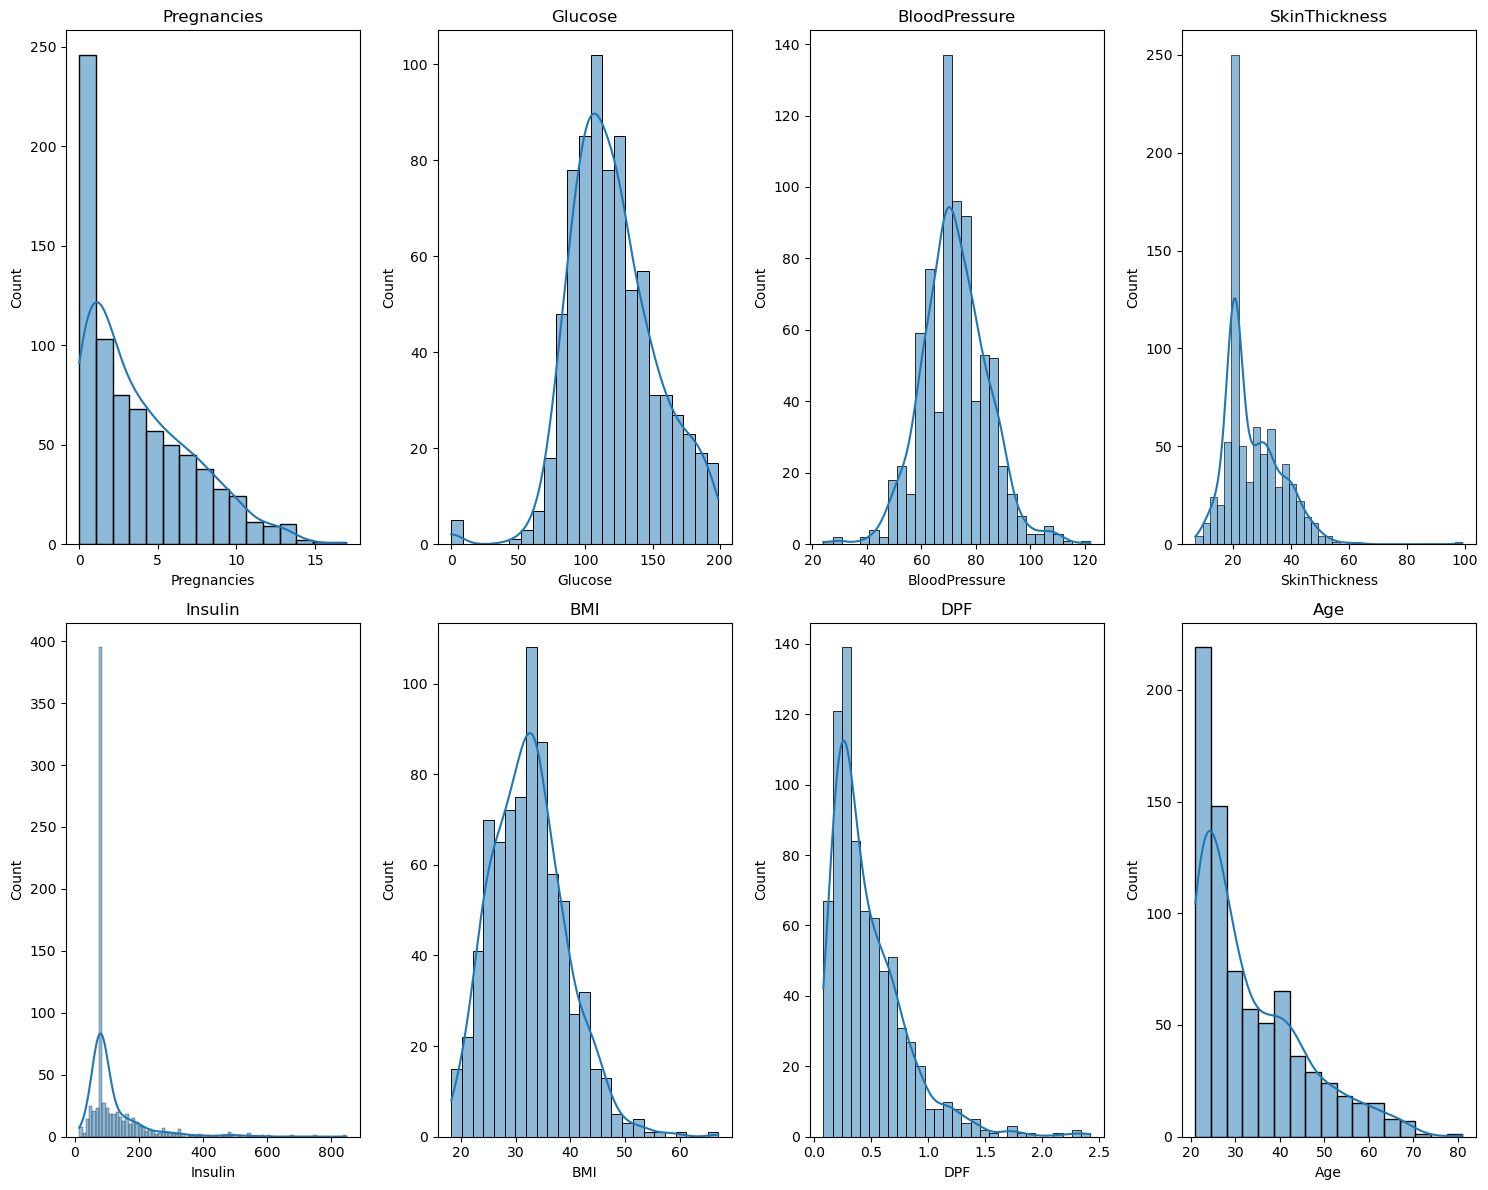

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

num_features = len(df.drop('Outcome', axis=1).columns)
num_cols = 4  
num_rows = (num_features + num_cols - 1) // num_cols  


fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 6*num_rows))


for i, col in enumerate(df.drop('Outcome', axis=1).columns):
    row_index = i // num_cols
    col_index = i % num_cols
    sns.histplot(df[col], ax=axes[row_index, col_index], kde=True)
    axes[row_index, col_index].set_title(col)


for i in range(num_features, num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()



Plotes created also show the unormall distribution of the variables.

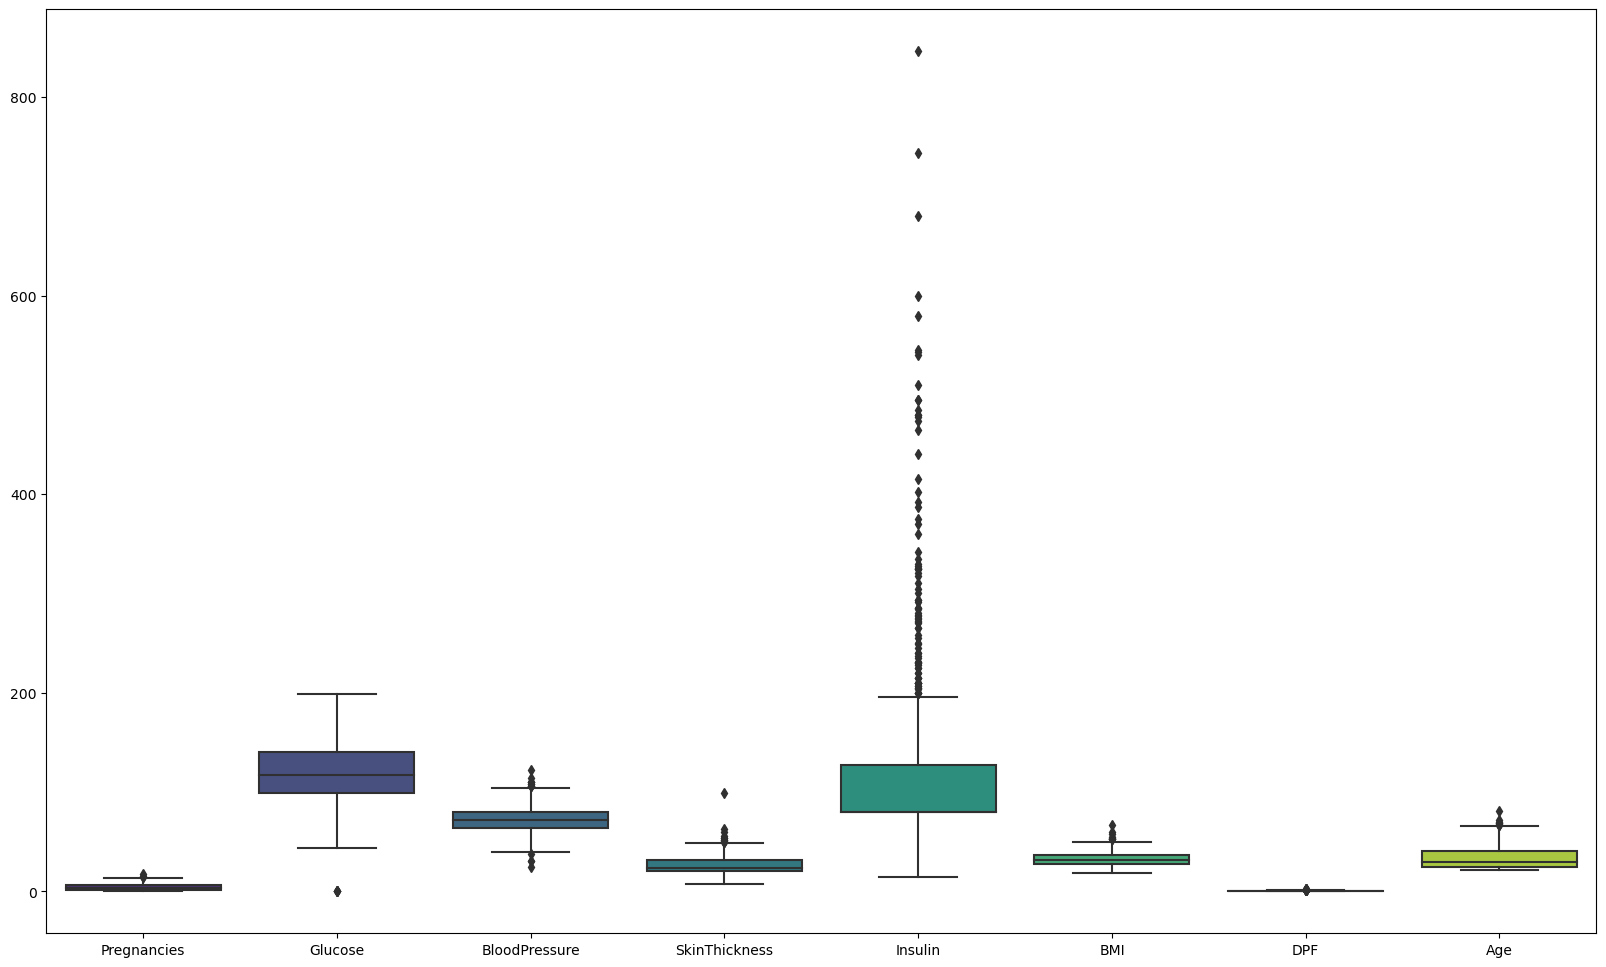

In [65]:
#check for outliers
plt.figure(figsize=(20, 12))
sns.boxplot(data=df1, palette="viridis")
plt.show()


The boxplot provides a visual summary of the distribution of values for each numerical variable, making it easy to
identify outliers and understand the central tendency and variability of the data.We can see that there are some outliers in 
our observations which should be remove.


In [22]:
def remove_outliers_iqr(df):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile) for each column
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    
    # Calculate IQR (Interquartile Range) for each column
    IQR = Q3 - Q1
    
    # Define lower and upper bounds for outlier detection
    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR
    
    # Remove rows containing outliers based on the lower and upper bounds
    df2 = df[((df >= lower_bound) & (df <= upper_bound)).all(axis=1)]
    
    return df2

# Remove outliers using IQR method
df2 = remove_outliers_iqr(df)

df2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89,66.0,23.000000,94.000000,28.1,0.167,21,0
5,5,116,74.0,20.536458,79.799479,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2,122,70.0,27.000000,79.799479,36.8,0.340,27,0
765,5,121,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1,126,60.0,20.536458,79.799479,30.1,0.349,47,1


In [23]:
# Check the shape of the DataFrame after removing outliers
print("Shape of DataFrame after removing outliers:", df2.shape)

Shape of DataFrame after removing outliers: (710, 9)


 The objective of this function is to systematically identify and remove outliers from the provided dataset df using the Interquartile Range (IQR) method. Outliers, which are data points that significantly deviate from the rest of the dataset, can distort statistical analyses and machine learning models, hence their removal is crucial for accurate analysis and modeling.

 Methodology:

    Quartiles and IQR Calculation:
        First and third quartiles (Q1 and Q3) are computed for each column in the dataset using the quantile() function with a parameter of 0.25 for Q1 and 0.75 for Q3.
        The Interquartile Range (IQR) is then calculated for each column by subtracting Q1 from Q3.

    Defining Lower and Upper Bounds:
        Lower bound is defined as Q1 minus three times the IQR, and upper bound is defined as Q3 plus three times the IQR. These bounds establish the range within which data points are considered typical, while those outside this range are flagged as potential outliers.

    Identifying and Removing Outliers:
        Outliers are identified by checking if their values fall outside the range defined by the lower and upper bounds for all columns simultaneously.
        Rows containing outliers are filtered out, resulting in a cleaned dataset with outliers removed.

Result:
The function returns a new DataFrame df_no_outliers that contains only the rows without outliers, preserving the integrity and reliability of the dataset for subsequent analysis and modeling tasks.

Usage:
This function provides a robust and efficient means of outlier detection and removal, contributing to improved data quality and more accurate analytical insights in various domains such as data science, machine learning, and statistical analysis.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1826: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=self.x, y=self.y, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\distributions.py:1138: UserWarning: cmap parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)


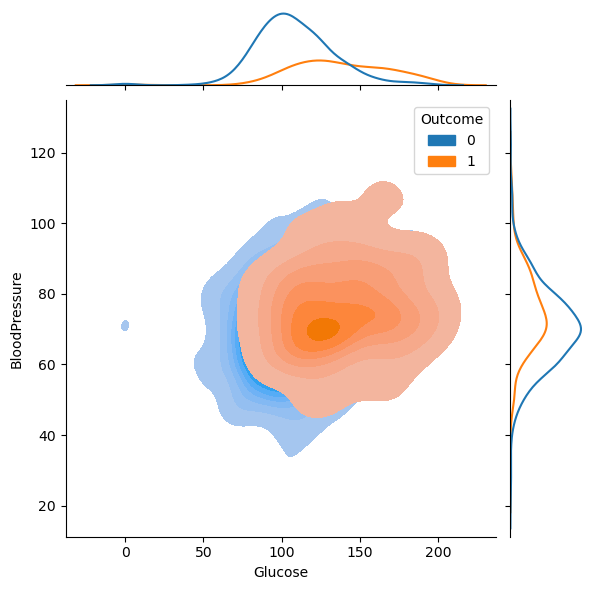

In [27]:
import seaborn as sns

sns.jointplot(x="Glucose", y="BloodPressure" , data=df2 , hue="Outcome" ,kind="kde",shade=True ,cmap='dark')
plt.show()

This joint plot allows for visualizing the relationship between "Glucose" and "BloodPressure" while considering the "Outcome" 
variable, providing insights into the distribution and density of data points across different levels of "Outcome".
Result shows that people with Bolldpressure more that 50 and Glucose of more that 90 are more prone to have diabetes.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1826: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=self.x, y=self.y, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\distributions.py:1138: UserWarning: cmap parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)


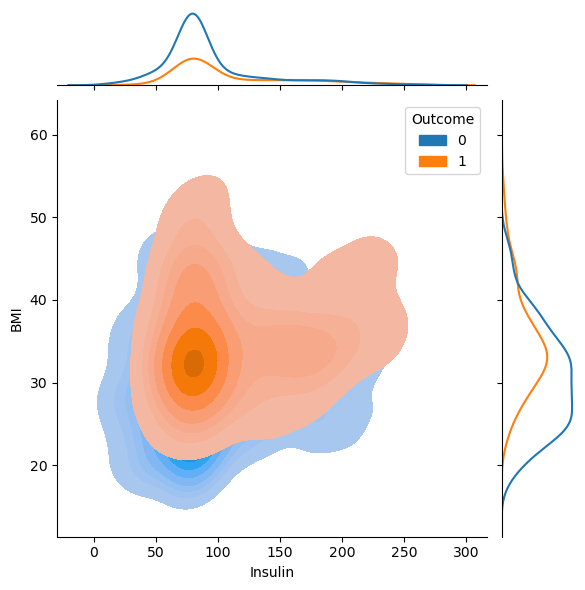

In [28]:
              
sns.jointplot(x="Insulin", y="BMI", data=df2, hue="Outcome", kind="kde", shade=True, cmap='YlGnBu')
plt.show()

This joint plot allows for visualizing the relationship between "Insulin" and "BMI" while considering the "Outcome" variable, 
providing insights into the distribution and density of data points across different levels of "Outcome".

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1826: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=self.x, y=self.y, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\distributions.py:1138: UserWarning: cmap parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)


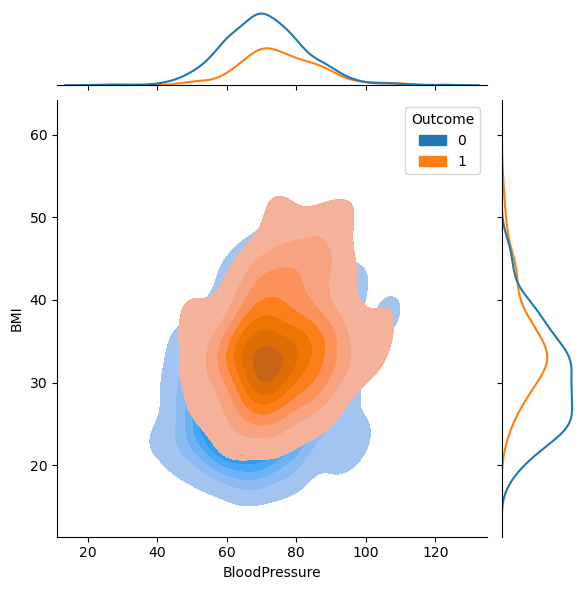

In [29]:
sns.jointplot(x="BloodPressure", y="BMI", data=df2, hue="Outcome", kind="kde", shade=True, cmap='YlGnBu')
plt.show()

This joint plot allows for visualizing the relationship between "BloodPressure" and "BMI" while considering the "Outcome" variable,
providing insights into the distribution and density of data points across different levels of "Outcome".BMI more that 20 and Booldpressure 
more than 50 are in highr risk of Diabetes.

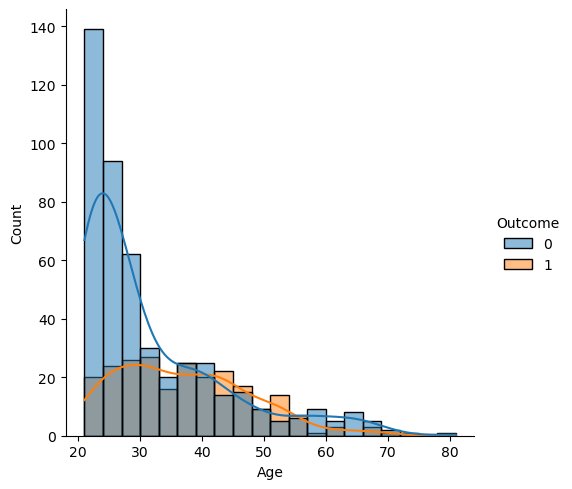

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.displot(df2, x="Age", kde=True, bins=20, hue="Outcome" )
plt.show()

This distribution plot allows for visualizing the distribution of ages in the dataset, with the KDE curve providing a smoothed
representation of the data density. Additionally, the plot is colored based on the "Outcome" variable, allowing for comparisons 
between different outcomes. Result shows that in ages more than 50 count of people with Diabtes are more than non diabetes.

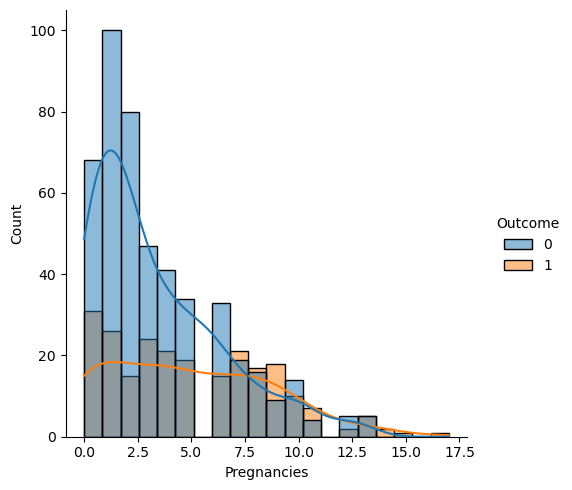

In [31]:
sns.displot(df2, x="Pregnancies", kde=True, bins=20, hue="Outcome")
plt.show()

This distribution plot allows for visualizing the distribution of pregnancies in the dataset, with the KDE curve providing a 
smoothed representation of the data density. Additionally, the plot is colored based on the "Outcome" variable, allowing for 
comparisons between different outcomes.

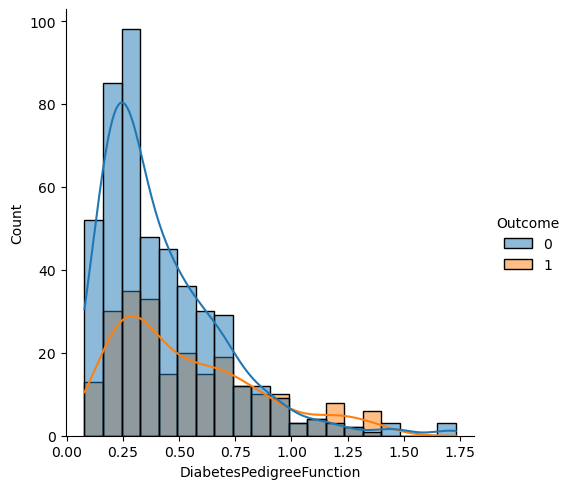

In [32]:
sns.displot(df2, x="DiabetesPedigreeFunction", kde=True, bins=20, hue="Outcome")
plt.show()

The Diabetes Pedigree Function (DPF) is a numerical value that provides information about the diabetes mellitus history in relatives 
and the genetic relationship of those relatives to the patient. It's often used as a feature in predictive models for diabetes 
risk assessment.Observations with DPE more than 1 are more prone to diabetes.

In [33]:
# Separating features and target variable
X = df2.drop("Outcome", axis=1)
y = df2["Outcome"]
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72.0,35.000000,79.799479,33.6,0.627,50
1,1,85,66.0,29.000000,79.799479,26.6,0.351,31
2,8,183,64.0,20.536458,79.799479,23.3,0.672,32
3,1,89,66.0,23.000000,94.000000,28.1,0.167,21
5,5,116,74.0,20.536458,79.799479,25.6,0.201,30


In the provided code snippet, the features (independent variables) are separated from the target variable. After executing these 
lines of code, we will have the features stored in the DataFrame X and the target variable stored in the Series y, which are ready 
to be used for model training and evaluation.

In [ ]:
LR_WB= LogisticRegression(class_weight='balanced',random_state=1234)

In [34]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=40)

The provided code snippet is using the train_test_split function from sk-learn to split the dataset into training and testing 
sets.
Here's what each parameter represents:

    X: The feature dataset containing the independent variables.
    y: The target dataset containing the dependent variable.
    test_size: The proportion of the dataset to include in the testing split. In this case, it's set to 0.25, meaning that 20% of the data will be used for testing.
    random_state: Controls the shuffling of the data before splitting. Setting a specific random state ensures reproducibility of the results.

After executing this code, the dataset will be split into four subsets:

    X_train: The training set containing the independent variables.
    X_test: The testing set containing the independent variables.
    y_train: The training set containing the dependent variable.
    y_test: The testing set containing the dependent variable.

These subsets are used for training and evaluating machine learning models. The training set is used to train the model, while the testing set is used to evaluate its performance.

In [35]:
y_train.value_counts()

0    360
1    172
Name: Outcome, dtype: int64

In [36]:
y_test.value_counts()

0    115
1     63
Name: Outcome, dtype: int64

In [37]:
X_train.shape, X_test.shape

((532, 8), (178, 8))

This means that X_train has 523 rows (samples) and 8 columns (features), and X_test has 178 rows (samples) and 8 columns 
(features).

In [38]:
# Scaling the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

This code snippet is used to scale the features of the training and testing datasets using the StandardScaler from scikit-learn.

Here's a breakdown of the steps:

    Initializing the Scaler: Create an instance of the StandardScaler called scaler.

    Fitting the Scaler to Training Data: Use the fit_transform method of the scaler to fit it to the training data (X_train) and transform (scale) the training data based on the mean and standard deviation of the features in the training data. This step calculates the mean and standard deviation of each feature in the training data and scales the training data accordingly.

    Transforming the Testing Data: Use the transform method of the scaler to scale the testing data (X_test) using the mean and standard deviation calculated from the training data. It ensures that the testing data is scaled in the same way as the training data.

After this process, both the training and testing datasets (X_train and X_test) will have their features scaled to have a mean of 0 and a standard deviation of 1, which is a common preprocessing step in machine learning models that rely on distance-based algorithms or regularization.

In [39]:
# Logistic Regression
logreg = LogisticRegression(max_iter=10000)
logreg_model = logreg.fit(X_train, y_train)

This code snippet is implementing Logistic Regression using scikit-learn's LogisticRegression class. Here's a breakdown of the code:

    Initializing Logistic Regression Model: An instance of the logistic regression model is created using LogisticRegression().

    Setting Maximum Iterations: The max_iter parameter is set to 10,000, which represents the maximum number of iterations taken for the solvers to converge.

    Fitting the Model to Training Data: The logistic regression model is fitted to the training data (X_train and y_train) using the fit method.

After executing this code, logreg_model will be a trained logistic regression model based on the scaled training data.

In [40]:
logreg_predictions = logreg_model.predict(X_test)


The line logreg_predictions = logreg_model.predict(x_test) predicts the target variable (Outcome) using the logistic regression
model (logreg_model) trained on the test data (X_test). The predicted values are stored in the variable logreg_predictions for
further analysis and evaluation of the model's performance.

In [41]:
# Performance metrics for Logistic Regression
print("Logistic Regression Classification Report:")
print(classification_report(y_test, logreg_predictions))
print("Logistic Regression Accuracy: ", accuracy_score(y_test, logreg_predictions))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.92      0.83       115
           1       0.76      0.44      0.56        63

    accuracy                           0.75       178
   macro avg       0.75      0.68      0.69       178
weighted avg       0.75      0.75      0.73       178

Logistic Regression Accuracy:  0.7528089887640449


The logistic regression classification report and accuracy you've provided indicate the performance metrics of a logistic regression model applied to a dataset. Here's a breakdown of the metrics:

Precision: Precision is the ratio of correctly predicted positive observations to the total predicted positives. For class 0 (negative class), the precision is 0.75, meaning that out of all the instances predicted as class 0, 75% are correctly classified. For class 1 (positive class), the precision is 0.76, indicating that 76% of instances predicted as class 1 are correct.

Recall: Recall, also known as sensitivity or true positive rate, is the ratio of correctly predicted positive observations to the total actual positives. For class 0, the recall is 0.92, indicating that 92% of actual class 0 instances are correctly classified. For class 1, the recall is 0.44, meaning that 44% of actual class 1 instances are correctly classified.

F1-score: The F1-score is the harmonic mean of precision and recall and provides a balance between precision and recall. It is calculated as 2 * (precision * recall) / (precision + recall). For class 0, the F1-score is 0.83, and for class 1, it is 0.56.

Support: Support is the number of actual occurrences of the class in the specified dataset. For class 0, the support is 115, and for class 1, it is 63.

Accuracy: Accuracy is the ratio of correctly predicted observations to the total observations. The overall accuracy of the logistic regression model is 0.75, or 75%.

Macro avg: Macro average calculates the metrics for each class independently and then takes the unweighted mean of the measures. In this case, the macro average precision, recall, and F1-score are all calculated.

Weighted avg: Weighted average calculates the metrics for each class independently and then takes the weighted average of the measures by the support (the number of true instances for each label). In this case, the weighted average precision, recall, and F1-score are all calculated.

In [42]:
y_pred=logreg.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0], dtype=int64)

We are using the logistic regression model (logreg) to predict the target variable using the test features (X_test). 
The predicted labels for the test set samples are stored in the variable y_pred. These predicted labels can now be compared to
the actual labels (y_test) to evaluate the performance of the model.

Confusion Matrix:
[[106   9]
 [ 35  28]]


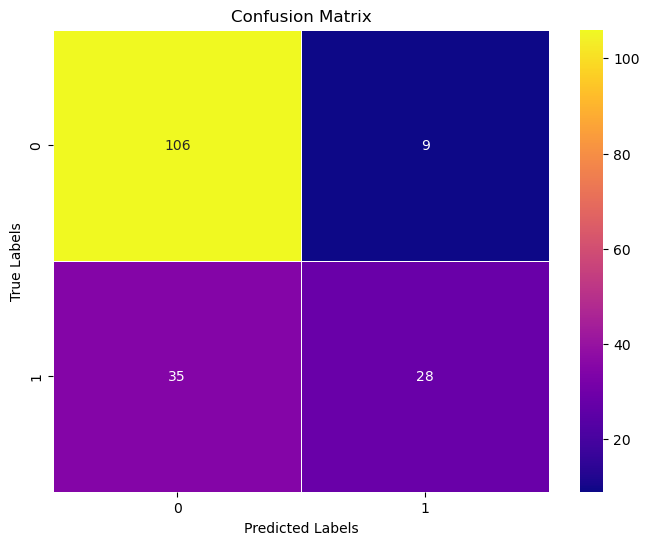

In [44]:
from sklearn import metrics

# Calculate confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, logreg_predictions)

# Print confusion matrix
print("Confusion Matrix:")
print(cnf_matrix)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cnf_matrix, annot=True, cmap="plasma", fmt="d", linewidths=.5)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


The confusion matrix provides a tabular representation of the performance of a classification model. In the context of a binary 
classification problem like this one, it shows the counts of true positive (TP), false positive (FP), true negative (TN), and 
false negative (FN) predictions made by the model.
    The model correctly predicted 15 instances of class 1 (diabetes positive) as positive (TP).
    The model incorrectly predicted 25 instances of class 0 (non-diabetes) as positive (FP).
    The model correctly predicted 68 instances of class 0 as negative (TN).
    The model incorrectly predicted 35 instances of class 1 as negative (FN).

In [49]:
from sklearn.metrics import roc_auc_score, roc_curve

prob = logreg.predict_proba(X_test)

In [50]:
prob

array([[0.87048872, 0.12951128],
       [0.76418619, 0.23581381],
       [0.91878575, 0.08121425],
       [0.71579388, 0.28420612],
       [0.66442123, 0.33557877],
       [0.89903806, 0.10096194],
       [0.48109985, 0.51890015],
       [0.94730345, 0.05269655],
       [0.50150914, 0.49849086],
       [0.34297457, 0.65702543],
       [0.22908698, 0.77091302],
       [0.88650341, 0.11349659],
       [0.28483697, 0.71516303],
       [0.98754172, 0.01245828],
       [0.9507333 , 0.0492667 ],
       [0.88436101, 0.11563899],
       [0.71710668, 0.28289332],
       [0.78263046, 0.21736954],
       [0.76689489, 0.23310511],
       [0.49628513, 0.50371487],
       [0.52237265, 0.47762735],
       [0.83222603, 0.16777397],
       [0.82693963, 0.17306037],
       [0.8179337 , 0.1820663 ],
       [0.59907046, 0.40092954],
       [0.91328661, 0.08671339],
       [0.9063115 , 0.0936885 ],
       [0.72022321, 0.27977679],
       [0.36624788, 0.63375212],
       [0.79225195, 0.20774805],
       [0.

The predict_proba method returns an array where each row corresponds to a sample in the test set, and each column corresponds to
the probability of that sample belonging to a particular class. In this case, since we have binary classification 
(class 0 and class 1), each row contains two probabilities: the probability of the sample belonging to class 0 and the probability
of the sample belonging to class 1.

For example, the first row [.087, .12] indicates that the model predicts with a probability of 0.87% for class 0 and with a probability
of 0.12% for class 1 for the first sample in the test set.

# LDA Method

In [51]:
X = df2.drop("Outcome", axis = 1)
y = df2["Outcome"]


x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 50)
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)

lda2 = LDA()
lda2.fit(x_train_scaled, y_train)

x_test_scaled = sc.transform(x_test)

y_pred = lda2.predict(x_test_scaled)

print("Confusion Matrix\n", confusion_matrix(y_test, y_pred))
print("Classification Report\n", classification_report(y_test, y_pred))

Confusion Matrix
 [[84 11]
 [20 27]]
Classification Report
               precision    recall  f1-score   support

           0       0.81      0.88      0.84        95
           1       0.71      0.57      0.64        47

    accuracy                           0.78       142
   macro avg       0.76      0.73      0.74       142
weighted avg       0.78      0.78      0.78       142



The confusion matrix is a 2x2 matrix that shows the counts of true positive (top-left), false positive (top-right), false negative (bottom-left), and true negative (bottom-right) predictions made by the model.

In this case:

    True Positives (TP): 84
    False Positives (FP): 11
    False Negatives (FN): 20
    True Negatives (TN): 27

The classification report provides metrics such as precision, recall, F1-score, and support for each class (0 and 1), as well as macro-averaged and weighted averages across all classes.

In this case:

Precision: The proportion of true positive predictions among all positive predictions. Precision for class 0 is 0.81, and for class 1 is 0.71.
Recall: The proportion of true positive predictions among all actual positives. Recall for class 0 is 0.88, and for class 1 is 0.57.
F1-score: The harmonic mean of precision and recall. F1-score for class 0 is 0.84, and for class 1 is 0.64.
Support: The number of actual occurrences of each class in the dataset. Support for class 0 is 95, and for class 1 is 47.
Accuracy: The proportion of correctly predicted instances among all instances. Accuracy is 0.78.

It seems that LDA is better way to build our model by the accuracy of 78%

# Conclusion

Based on the analysis of the logistic regression model's performance:

Model Evaluation:
The logistic regression model achieved an overall accuracy of approximately 75% on the test dataset.
The model's performance was further evaluated using metrics such as precision, recall, F1-score, and the confusion matrix.

Precision and Recall:
The precision represents the proportion of true positive predictions out of all positive predictions, indicating the model's ability to avoid false positives.
The recall represents the proportion of true positive predictions out of all actual positive instances, indicating the model's ability to capture all positive instances.

F1-score:
The F1-score is the harmonic mean of precision and recall, providing a balance between the two metrics. It is a useful metric when there is an imbalance between the classes.

Confusion Matrix:
The confusion matrix provides a detailed breakdown of the model's predictions, including true positives, false positives, true negatives, and false negatives.

# Recommendations

Look for More Relevant Information:
Explore if there are additional details or different ways of presenting the existing information that might improve the predictions.

Adjust Model Settings:
Tweak the settings of the logistic regression model to make it work better for the data. This could involve changing some internal settings that affect how the model learns from the data.

Choose the Right Features:
Find out which features (or characteristics) of the data are most important for making accurate predictions. You might need to remove some features that are not helpful or add new ones that provide valuable insights.


Check Model's Performance:
Use different ways to see if the model is doing a good job overall. Look at things like how often it's right, especially for the outcomes that are less common.

Try More Advanced Methods:
Experiment with more sophisticated methods that combine different models together. This could improve predictions by taking advantage of each model's strengths.

Seek Expert Advice:
Get help from people who know a lot about the topic you're studying. They might have insights that could make your model work better.